In [6]:
%matplotlib inline
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

In [7]:
#Classical Search

In [8]:
myList = [5,4,6,9,1,2,3,7,8,0]

In [9]:
def oracle(number):
    winningNumber = 8
    if number == winningNumber:
        response = True
    else:
        response = False
    return response

In [10]:
for index, number in enumerate(myList):
    if oracle(number) is True:
        print(f"winning number index: {index}")
        print(f"execution count: {index+1}")
        break

winning number index: 8
execution count: 9


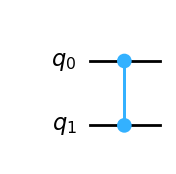

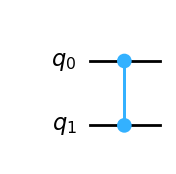

In [11]:
#Quantum Model with Grover's Algorithm
#Oracle Circuit (WinningNumber = 11)

oracleCircuit = QuantumCircuit(2,name='oracleCircuit')
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()
oracleCircuit.draw(output='mpl')

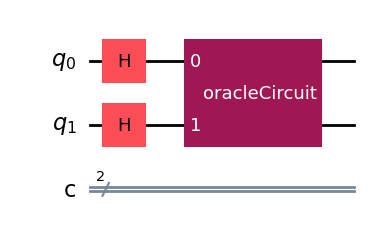

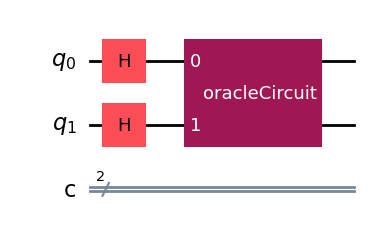

In [12]:
mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.draw(output='mpl')

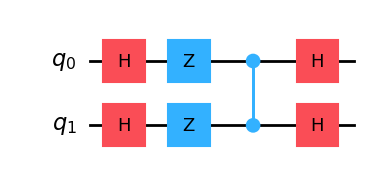

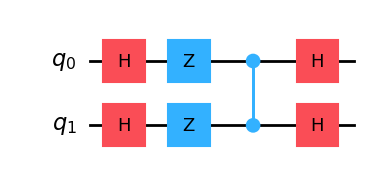

In [13]:
reflectionCircuit = QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()
reflectionCircuit.draw(output='mpl')

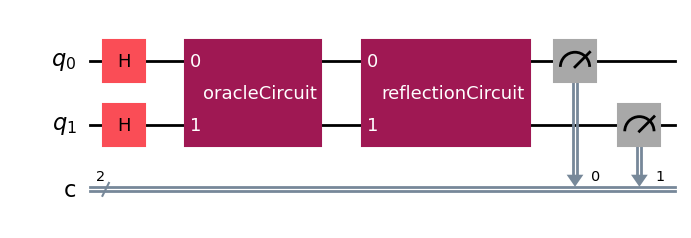

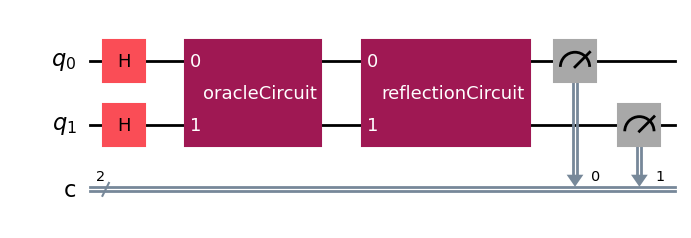

In [14]:
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

In [15]:
service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)

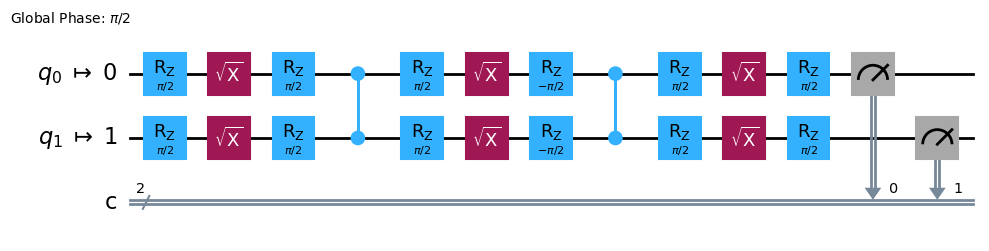

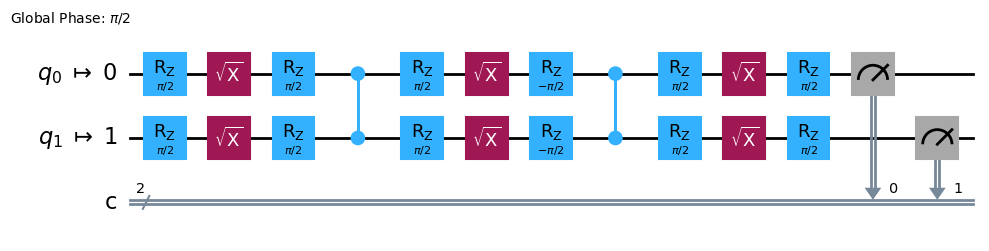

In [16]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(mainCircuit)
 
isa_circuit.draw("mpl", idle_wires=False)

In [17]:
sampler = Sampler(mode=backend)
jobSampler = sampler.run([isa_circuit], shots=100)
result = jobSampler.result()
counts = result[0].data.c.get_counts()
print(counts)

{'10': 20, '11': 63, '01': 10, '00': 7}


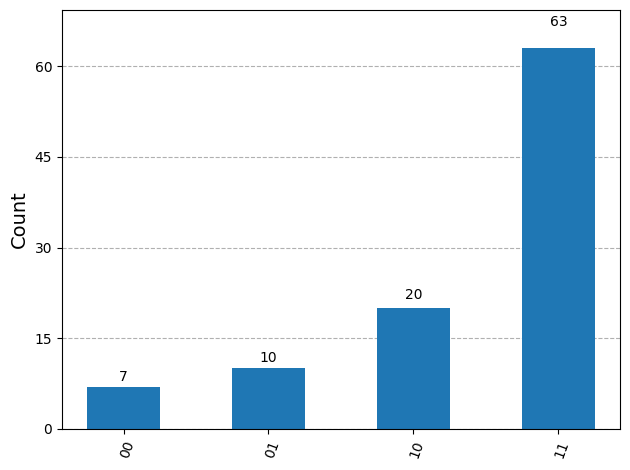

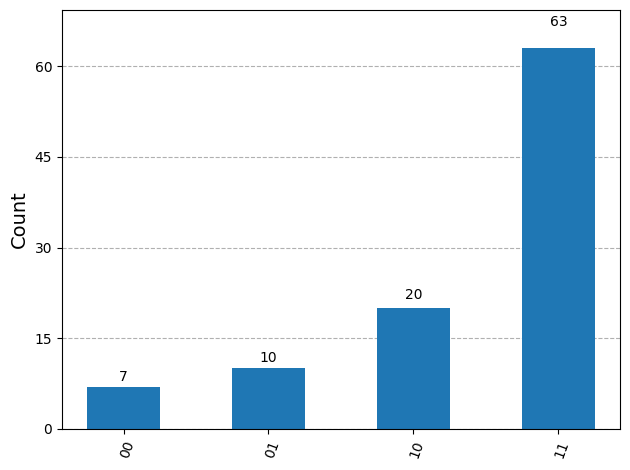

In [18]:
plot_histogram(counts)